##### 
# Trees & Model Improvement (Workbook)

### ITCS 5156
### Minwoo "Jake" Lee

<br/>
<font color="blue"><b>

NAME: Zachary Hamilton

</b> </font>

# Goal

The goal of this activity is to pratice decision trees and random forest to classification problem. We also pracctice hyper-parameter optimization and feature selection to further improve the performance of the classifiers. We will use the [Abalone dataset](https://archive.ics.uci.edu/ml/datasets/Abalone) from last week again. Follow the TODO titles and comments to finish the activity! 

# Agenda

* Data Preparation
* Data visualization 
* Decision Trees
* Random Forest
* Hyper-Parameter Optimization
* Feature Selection
  
  

# Tables of TODO's


1. [TODO1 (5 points)](#TODO1) 
2. [TODO2 (5 points)](#TODO2) 
3. [TODO3 (5 points)](#TODO3) 
4. [TODO4 (15 points)](#TODO4)  
5. [TODO5 (5 points)](#TODO5) 
6. [TODO6 (10 points)](#TODO6) 
7. [TODO7 (10 points)](#TODO7) 
8. [TODO8 (10 points)](#TODO8) 
9. [TODO9 (5 points)](#TODO9) 
10. [TODO10 (5 points)](#TODO10) 
12. [TODO11 (5 points)](#TODO11) 
13. [TODO12 (10 points)](#TODO12) 
13. [TODO13 (4 points)](#TODO13) 
13. [TODO14 (4 points)](#TODO14) 
18. [Feedback (2 points)](#TODO18) 

Well, let us start the lab with importing the common libraries first. 

In [3]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

import seaborn as sns

# Datasets 

We are reusing the Abalone data set again. Here are the copy of the description from the last module.

### Abalone Dataset 

The dataset we'll be using this week is the Abalone Dataset (pronounced ab·​a·​lo·​ne). For those that don't know, abalone are marine snails. The original goal of this data is to predict the age of a given abalone. Typically, this is done by counting the number of rings the shell contains (much like tree ring counting). However, counting the rings of an abalone shell is expensive (see description below). Thus, the authors of the data wish to use other features to predict age. 

**It turns out that predicting age is actually quite hard, so we'll focus on predicting other features such as sex. More on this later...**

You can find the detailed description and relevant papers from the [link](https://archive.ics.uci.edu/ml/datasets/Abalone). 
You can directly download the file from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data).


<table>
    <tr>
        <td><img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large174.jpg" width=200 /></td>
    </tr>
</table>    


Well, we are going thorugh the routine. For this TODO, you can simply copy and paste from the previous lab. 

<div id="TODO1"></div>

### TODO1 (5 points)
1. Using Pandas DataFrame, read the two csv files and store them to `df_air` and `df_abalone` respectively.  
2. Print the summary using `describe`. 
3. Add a plot of your choice for repeating the visualization
4. Partition the data as before. 


In [4]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  187k  100  187k    0     0   359k      0 --:--:-- --:--:-- --:--:--  358k


In [5]:

# TODO 1.1

df_abalone = pd.read_csv('abalone.data',delimiter=',',names=['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
df_abalone['Sex'] = pd.factorize(df_abalone['Sex'])[0]
# TODO 1.2
df_abalone.describe()



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Visualization (TODO 1.3)
Put your own plot and observation here.


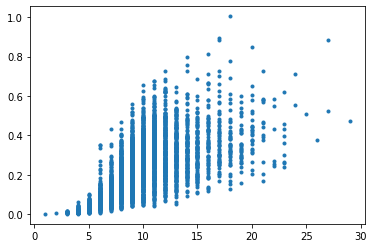

In [6]:
## plot code here
plt.plot(df_abalone['Rings'],df_abalone['Shell weight'],'.')


I picked this graph, rings by shell weight, to see if there is a correlation. I think the graph shows that the more rings the heavier the shell.

### Data Partitioning (TODO 1.4)

Now, partition data.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(df_abalone.drop('Sex',axis=1), df_abalone['Sex'],test_size=0.2)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))



Train data shape: (3341, 8)
Train target shape: (3341,)
Test data shape: (836, 8)
Test target shape: (836,)


# Decision Tree Classification

<div id="TODO2"></div>

### TODO2 (5 points)

1. Create a `DecisionTreeClassifier` instance and store it to `clf`.  
2. Train the model and compute the train and test accuracy.



In [8]:
# TODO Import
from sklearn.tree import DecisionTreeClassifier

# TODO 1
clf = DecisionTreeClassifier(random_state=0)

# TODO 2
clf.fit(X_train,t_train)
test_score = clf.score(X_test,t_test)
train_score = clf.score(X_train,t_train)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))


Train Accuracy: 1.0, Test Accuracy: 0.4688995215311005


<div id="TODO3"></div>

### TODO3 (5 points)

Now, let us plot the results and see how much of test misses we have. 

1. Compute the predictions for test data `X_test`.
2. Sort the `t_test` with `argsort` in Numpy.
3. Using the sorted index, present the target label (in red line) and predictions (blue dots).


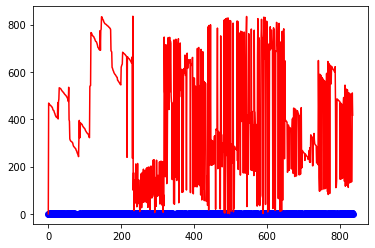

In [9]:

# TODO 1
y_test = clf.predict(X_test)

# TODO 2
T_test = np.argsort(t_test.to_numpy())

# TODO 3
plt.plot(y_test,'bo')
plt.plot(T_test,'r')


## Classification Evaluation

Let us prepare a report for classification evaluation.


<div id="TODO9"></div>

### TODO4 (15 points)

Referring the previous lab exercise, complete `evaluation_report` function. 



1. Fill in the function, following the instructions: 
  1. Compute the train/test accuracy and print 
  1. Print the sklearn `matthews_corrcoef` or MCC using the test data.
  1. Print sklearn `classificaiton_report` metrics using the test results.
  1. Plot the sklearn `confusion_matrix` with the sklearn `ConfusionMatrixDisplay` class using the test data.
2. Run the function to evaluate the decision tree that we just trained. 
3. From the metrics, how do you evaluate the performance. Did you find any problem of the model? 

In [10]:
# TODO: import the necessary modules
from sklearn.metrics import matthews_corrcoef, confusion_matrix, classification_report, ConfusionMatrixDisplay

"""
   evalu8ation report
       create a classification evaluation using
          accuracy, MCC, classification_report, confusion matrix, and ROC Curve (AUC as well)
          
       parameters
       -----------
       model      trained classifier instance
       data       tuple of (X_train, X_test, t_train, t_test)
"""
def evaluation_report(model, data):
    print("{}\n===========================\n".format(clf.__class__.__name__))
    
    X_train, X_test, t_train, t_test = data
    
    #### 
    # TODO Print train & test accuracy
    
    y_test = model.predict(X_test)
    test_score = model.score(X_test,t_test)
    train_score = model.score(X_train,t_train)
    print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))
    
    
    # TODO  print MCC score
    print(matthews_corrcoef(t_test,y_test))
    
    # TODO  print classification report
    print(classification_report(t_test,y_test))
    
    # TODO plot confusion matrix
    cm = confusion_matrix(t_test, y_test, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    
    disp.plot() 
    
    
    plt.title(clf.__class__.__name__)


DecisionTreeClassifier

Train Accuracy: 0.8892547141574378, Test Accuracy: 0.9114832535885168
0.867167659409978
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       302
           1       0.86      0.90      0.88       249
           2       0.95      0.93      0.94       285

    accuracy                           0.91       836
   macro avg       0.91      0.91      0.91       836
weighted avg       0.91      0.91      0.91       836



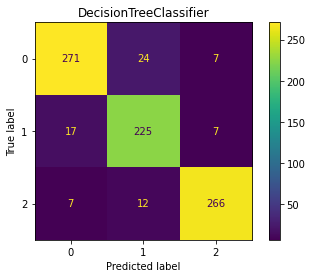

In [11]:
# TODO 4.2

evaluation_report(clf,train_test_split(df_abalone.drop('Sex',axis=1), df_abalone['Sex'],test_size=0.2))

`TODO4.2` From the metrics, how do you evaluate the performance. Did you find any problem of the model? 

`ANSWER`

The test accuracy is higher than the training accuracy and both are high. This means there are no problems.

## Reviewing the tree

When the tree is small, eye observation is possible for us better understanding of the model/data. 
Let us plot the tree and see what we can learn from it. 




<div id="TODO5"></div>

### TODO5 (5 points)

1. Create a tree plot using `plot_tree`. 

<font color="red"><b>WARNING: THIS CODE CAN TAKE A LONG TIME TO RUN! </b></font>   


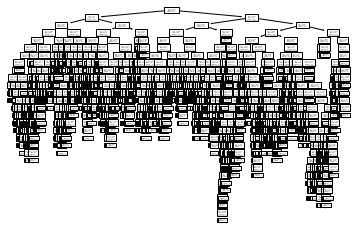

In [12]:
# TODO: Import
from sklearn import tree

# TODO: plot tree
tree.plot_tree(clf);


Whew~! The tree is huge! Is there any one who can read this? 
Can you plot this a bit readable by limiting the depth? 

<div id="TODO6"></div>

### TODO6 (10 points)

1. Redraw the tree plot with `max_depth=3`. 
2. What do you see from the tree plot? 

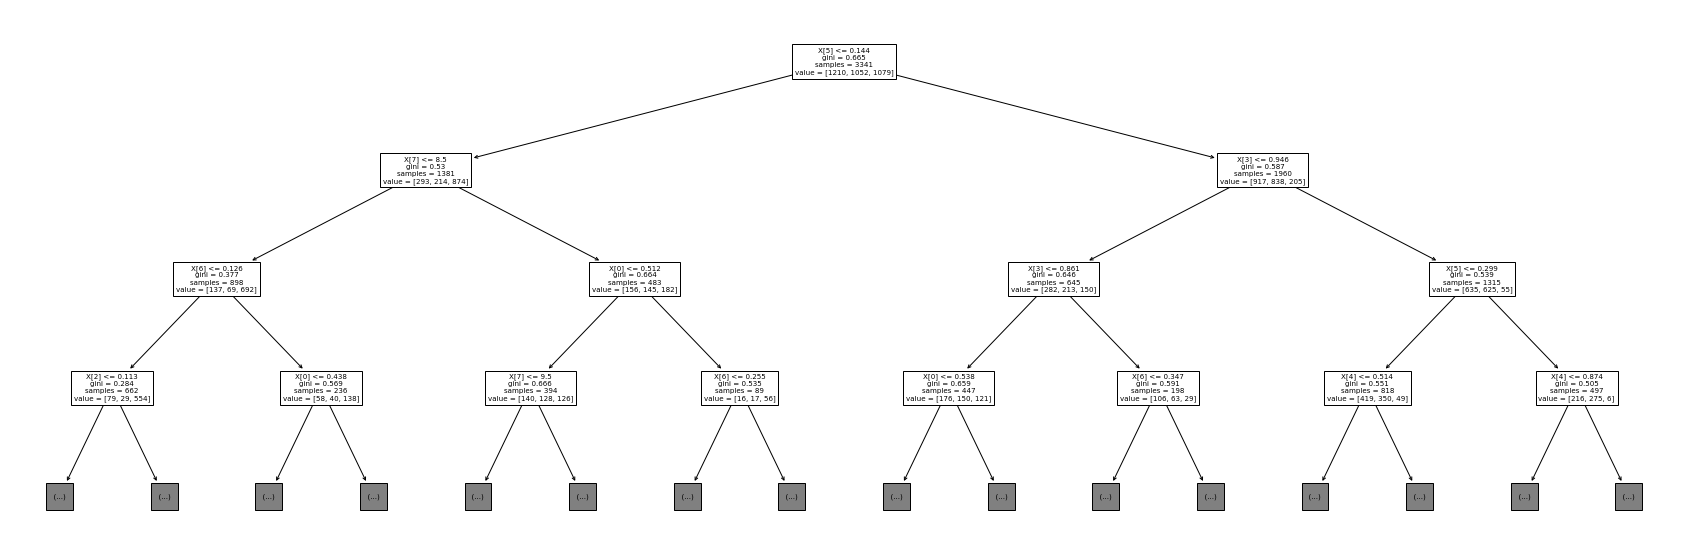

In [13]:

plt.figure(figsize=(30,10))
# TODO 1
tree.plot_tree(clf,max_depth=3);

`TODO6.2` From the tree, what were you able to observe? Is it telling you anything about the performance? Can you read it from the tree? 

`ANSWER`

The values and puriti score tells how well the model is classifying. Although it is the terminal, we can observe low gini scores and large mixture of samples from the values. 
This re-verifies the poor performance metric above. 

### Pruning the Tree

Now, let us try pruning the tree to improve the trainig speedn and model performance. 

<div id="TODO7"></div>

### TODO7 (10 points)

1. Create another decision tree instance with `max_depth=4` and store it to `pruned_tree`. 
2. plot the `pruned_tree`
3. run `evaluation_report` to measure the performance.
4. State your observation of the performance. 

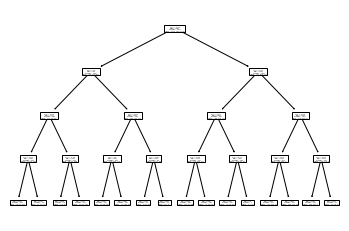

In [14]:
# TODO 1
pruned_tree = DecisionTreeClassifier(random_state=0,max_depth=4)
pruned_tree.fit(X_train,t_train)
# TODO 2
tree.plot_tree(pruned_tree);

DecisionTreeClassifier

Train Accuracy: 0.5698892547141574, Test Accuracy: 0.5574162679425837
0.335096122820623
              precision    recall  f1-score   support

           0       0.46      0.54      0.50       286
           1       0.44      0.26      0.33       254
           2       0.70      0.83      0.76       296

    accuracy                           0.56       836
   macro avg       0.53      0.54      0.53       836
weighted avg       0.54      0.56      0.54       836



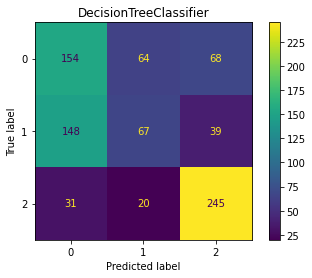

In [15]:
# TODO 3
evaluation_report(pruned_tree,train_test_split(df_abalone.drop('Sex',axis=1), df_abalone['Sex'],test_size=0.2))

`TODO7.4` State your observation of the pruned tree. Is it better than before?

`ANSWER`
no the pruned tree gives worst train and test accuracy.


# Random Forest

Now, it is time to use multiple trees. Using the random forest, let us examine if we can improve the performance. 
Before moving forward, we need to decide how many trees to form a forest. 

<div id="TODO8"></div>


### TODO8 (10 points)

Referring the lecture slides, plot the train, test, and out-of-bag performance against the number of estimators. 
1. import `RandomForestClassifier`. 
2. Create a `RandomForestClassifier` instance with `warm_start` and `oob_score` to be `True`. Then, store it to `rf`.
3. In a loop, 
  1. train the model with different number of estimators, 
  2. compute train, test and oob scores and append them to `errors` dictionary using the corresponding key (i.e., `train`, `test`, or `oob`). 
4. Plot three curves for the scores.
5. How many estimators do you think best? Explain why.  

**HINT: you can copy and paste the codes from the lecture slides to start this TODO.**

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Text(0.5, 0, '# estimators')

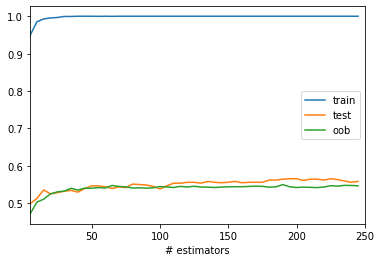

In [16]:
# TODO 1
from sklearn.ensemble import RandomForestClassifier

# TODO 2
rf = RandomForestClassifier(warm_start=True,oob_score=True)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 250
rng = range(min_estimators, max_estimators, 5)

errors = {'train': [], 'test': [], 'oob': []}

for n_est in rng:
    # TODO 3.A
    rf.set_params(n_estimators=n_est)  # set the number of trees
    rf.fit(X_train, t_train)
    
    
    # TODO 3.B
    train_score = rf.score(X_train, t_train)
    test_score = rf.score(X_test, t_test)
    
    errors['train'].append(train_score)
    errors['test'].append(test_score)
    errors['oob'].append(rf.oob_score_)
    
    
    
# TODO 4
plt.plot(rng, errors['train'], label="train")
plt.plot(rng, errors['test'], label="test")
plt.plot(rng, errors['oob'], label="oob")


plt.xlim(min_estimators, max_estimators)
plt.legend()
plt.xlabel("# estimators")    


`TODO8.5` How many estimators do you think best? Explain why.  


`ANSWER` The graph is highest at 149, so that should be the best amount of estimators


<div id="TODO9"></div>

### TODO9 (5 points)

1. Using the best number of estimators, create a random forest instance and store it to `rf`.  
2. Train the model and produce an evaluation report by using `evaluation_report`.



DecisionTreeClassifier

Train Accuracy: 0.914396887159533, Test Accuracy: 0.895933014354067
0.8430012019004546
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       324
           1       0.88      0.84      0.86       243
           2       0.92      0.97      0.94       269

    accuracy                           0.90       836
   macro avg       0.90      0.90      0.89       836
weighted avg       0.90      0.90      0.90       836



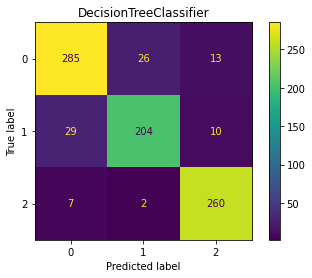

In [17]:

# TODO 1
rf = RandomForestClassifier(n_estimators=149) # set the number of trees
rf.fit(X_train, t_train)

# TODO 2
evaluation_report(rf,train_test_split(df_abalone.drop('Sex',axis=1), df_abalone['Sex'],test_size=0.2))


## Extremely Randomized Trees

Well, it seems very hard to achieve further improvement. Would additional randomization help to better generalize the model? 
Let us try extremely randomized trees. 

<div id="TODO10"></div>

### TODO10 (5 points)

1. Using the same number of estimators, create a `ExtraTreesClassifier` instance and store it to `erf`.  
2. Train the model and produce an evaluation report by using `evaluation_report`.



DecisionTreeClassifier

Train Accuracy: 0.9066147859922179, Test Accuracy: 0.9055023923444976
0.8587146961506622
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       288
           1       0.92      0.86      0.89       273
           2       0.93      0.96      0.94       275

    accuracy                           0.91       836
   macro avg       0.91      0.91      0.91       836
weighted avg       0.91      0.91      0.91       836



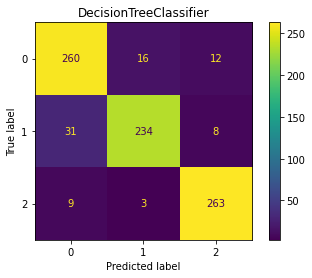

In [18]:
# enter your codes here
from sklearn.ensemble import ExtraTreesClassifier
erf = ExtraTreesClassifier(n_estimators=149, random_state=0)  # set the number of trees
erf.fit(X_train, t_train)
evaluation_report(erf,train_test_split(df_abalone.drop('Sex',axis=1), df_abalone['Sex'],test_size=0.2))


# Hyper-Parameter Search

Models that we have learned so far have many different hyper-parameters that we had to initialize with. 
The choice of hyper-parameters is critical to the performance of the model. 
As we seen above, the pruning options in decistion trees or the number of trees in random forest are the examples of hyper-parameters. 
Then, how can we find a good hyper-parameters? There are many different ways to optimize them. Let us practice some of them here. 


<div id="TODO11"></div>


### TODO11 (5 points)

Let us play with support vector machines (SVM) since it has many options that we needto pick. 
SVM has reguarlization parameter `C`, which is inversely proportional, thus the lower is `C`, the higher is the panalty. 
Also, youn pick different kernel such as `linear`, `poly`, `rbf`, and `sigmoid`. 
You can select `degree` in case you select polynomial kernel, but let us not assume the degree to be default 3 as it is to save our computation. 

The following guidance instructs you with `GridSearchCV` but you can choose either `GridSearchCV` or `RandomizeSearchCV`. 

1. Import `GridSearchCV` and `SVC`. 
2. Create `GridSearchCV` instance and store it to `clf` by passing `SVC` instance `svc`. 
3. Run the hyper-parameter search for the four possible kernel choices (`linear`, `poly`, `rbf`, and `sigmoid`) and the four values for regularization parameter (`0.01`, `0.1`, `1`. `10`). You will need to define `parameters` in TODO2.
4. Print out the best hyper-parameters, both the regularization parameter `C` and the kernel. 
5. Print the best score. 

<font color="red"><b>WARNING: THIS CODE CAN TAKE A LONG TIME TO RUN! </b></font>   


In [19]:
# TODO 1
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# TODO 2
parameters = {'kernel':('linear', 'poly','rbf','sigmoid'), 'C':[0.01, 0.1, 1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc,parameters)


# TODO 3
clf.fit(X_train,t_train)

# TODO 4 & 5
arr = np.array(clf.cv_results_['mean_test_score'])
top = np.array(sorted(arr))[len(arr)-1]

index = np.where(arr == top)

name = np.array(clf.cv_results_['params'])[index]
print(name)
print(top)

[{'C': 10, 'kernel': 'linear'}]
0.5549269174655175



<div id="TODO12"></div>


### TODO12 (10 points)

Now, let us plot the results and observe what hyper-parameters work best for SVM. 
`cv_results_` attribute is the dictionary that contains the grid search cross validation results. Here follows the how you access the values such as tested parameters `params`, mean and standard deviation of test scores for each hyper-parameter combination (grid). 

1. Read and run the following cells to understand how you access them. 
2. Create a plot that draws a line curve (use option 'o-') that compare the performance between each grid.
3. Use `fill_between` to plot the shade area for the variance of the test errors
  1. You need both `mean_test_score` and `std_test_score` for this.
4. What do you observe from the figure? Any particular pattern do you see?


In [20]:
clf.cv_results_['params']

[{'C': 0.01, 'kernel': 'linear'},
 {'C': 0.01, 'kernel': 'poly'},
 {'C': 0.01, 'kernel': 'rbf'},
 {'C': 0.01, 'kernel': 'sigmoid'},
 {'C': 0.1, 'kernel': 'linear'},
 {'C': 0.1, 'kernel': 'poly'},
 {'C': 0.1, 'kernel': 'rbf'},
 {'C': 0.1, 'kernel': 'sigmoid'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'poly'},
 {'C': 1, 'kernel': 'rbf'},
 {'C': 1, 'kernel': 'sigmoid'},
 {'C': 10, 'kernel': 'linear'},
 {'C': 10, 'kernel': 'poly'},
 {'C': 10, 'kernel': 'rbf'},
 {'C': 10, 'kernel': 'sigmoid'}]

In [21]:
param_names = ["C{}_{}".format(p['C'], p['kernel']) for p in clf.cv_results_['params']]
param_names

['C0.01_linear',
 'C0.01_poly',
 'C0.01_rbf',
 'C0.01_sigmoid',
 'C0.1_linear',
 'C0.1_poly',
 'C0.1_rbf',
 'C0.1_sigmoid',
 'C1_linear',
 'C1_poly',
 'C1_rbf',
 'C1_sigmoid',
 'C10_linear',
 'C10_poly',
 'C10_rbf',
 'C10_sigmoid']

In [22]:
clf.cv_results_['mean_test_score']


array([0.52978706, 0.48518926, 0.5088348 , 0.36156834, 0.53187974,
       0.5079348 , 0.51272656, 0.22656973, 0.54624876, 0.53038452,
       0.53158257, 0.20562597, 0.55492692, 0.53517136, 0.53696822,
       0.20323121])

In [23]:
clf.cv_results_['std_test_score']


array([0.01408265, 0.00886792, 0.01525202, 0.00067458, 0.01144197,
       0.0095567 , 0.019239  , 0.0278834 , 0.01163175, 0.0129317 ,
       0.01117311, 0.01693863, 0.01033772, 0.00842263, 0.00544619,
       0.01892993])

Text(0.5, 1.0, 'linear')

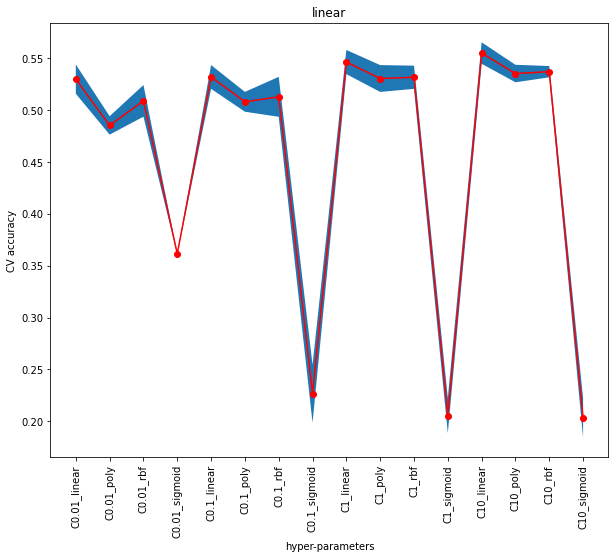

In [24]:

plt.figure(figsize=(10,8))
rng = range(len(param_names))

# TODO 3


plt.plot(np.array(clf.cv_results_['mean_test_score']),'ro-')
# TODO 2
plt.fill_between(rng,clf.cv_results_['mean_test_score'] - clf.cv_results_['std_test_score'],clf.cv_results_['mean_test_score'] + clf.cv_results_['std_test_score'])

# xtick, x and y label and title
plt.xticks(rng, param_names, rotation=90)
plt.xlabel("hyper-parameters")
plt.ylabel("CV accuracy")

# TODO add a title showing the best hyper-parameters

name = np.array2string(np.array(clf.cv_results_['param_kernel'])[index]).replace("'",'').replace('[','').replace(']','')

plt.title(name)


`TODO12.4` What do you observe from the figure? Any particular pattern do you see?

`ANSWER` Sigmonid is very bad compared to the other hyper-parameters

# Feature Selection

We have been using all the eight features to make a prediction. Well, is there any feature not necessary? 
Or is there any one actually distrubing the classification? 
It is reasonable to play with feature selection to selectively find a good set of features. 


<div id="TODO13"></div>


### TODO13 (4 points)

Let us try a naive feature selection method first.

1. Using `VarianceThreshold`, select features whose variance is higher than 0.1. 
2. How many features are selected? What are they? 
  * HINT: use `get_support()` to figure out selected features. 
 

In [27]:
# TODO 1
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
selector.fit_transform(df_abalone)
selector.get_support()



array([ True, False, False, False,  True, False, False, False,  True])

`TODO13.2` How many features are selected? What are they? 

`ANSWER` 3; sex, Whole weight, rings


<div id="TODO14"></div>


### TODO14 (4 points)

Let us learning algorithm involed to get what features are most important for predictions. 

1. Use `SequentialFeatureSelector` to select two features. We will use random forest `rf` that we previous decleared above. 
2. What features are selected? Is it same from the TODO13? 

In [28]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(rf, n_features_to_select=2)
sfs.fit(X_train, t_train)
sfs.get_support()



array([False, False,  True, False, False, False, False,  True])

`TODO14.2`  What features are selected? Is it same from the TODO13? 

`ANSWER`Diameter and rings, rings is the same from 13

<div id="TODO18"></div>

## Feedback (2 point)

Did you enjoy the lab? 

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER`5, This lab showed a really neat way to compare models.

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER`nothing

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER`none